# 1.Importação de Bibliotecas

In [19]:
# install pip
%pip install pandas | grep -v 'already satisfied'
%pip install seaborn | grep -v 'already satisfied'
%pip install numpy | grep -v 'already satisfied'
%pip install matplotlib | grep -v 'already satisfied'
%pip install scikit-learn | grep -v 'already satisfied'
%pip install jinja2 | grep -v 'already satisfied'

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Preparação para Modelagem Preditiva
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Carregar e fazer leitura dos dados dentro do projeto
caminho_do_arquivo = "../desafio-ds-imdb-diel/desafio_indicium_imdb.csv"
data = pd.read_csv(caminho_do_arquivo)

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
  Using cached jinja2-3.1.4-py3-none-any.whl.metadata (2.6 kB)
Using cached jinja2-3.1.4-py3-none-any.whl (133 kB)
Note: you may need to restart the kernel to use updated packages.


# 2.Entendimento de problema

In [20]:
# Verificar as linhas do data frame para inspeção
print('Visão dos dados:')
data = pd.DataFrame(data)
data.sample(7)

Visão dos dados:


,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
621,622,American Gangster,2007,A,157 min,"Biography, Crime, Drama",7.8,An outcast New York City cop is charged with b...,76.0,Ridley Scott,Denzel Washington,Russell Crowe,Chiwetel Ejiofor,Josh Brolin,392449,"130,164,645"
777,778,The Machinist,2004,R,101 min,"Drama, Thriller",7.7,An industrial worker who hasn't slept in a yea...,61.0,Brad Anderson,Christian Bale,Jennifer Jason Leigh,Aitana Sánchez-Gijón,John Sharian,358432,"1,082,715"
546,547,Charade,1963,U,113 min,"Comedy, Mystery, Romance",7.9,Romance and suspense ensue in Paris as a woman...,83.0,Stanley Donen,Cary Grant,Audrey Hepburn,Walter Matthau,James Coburn,68689,"13,474,588"
206,207,PK,2014,UA,153 min,"Comedy, Drama, Musical",8.1,An alien on Earth loses the only device he can...,NaN,Rajkumar Hirani,Aamir Khan,Anushka Sharma,Sanjay Dutt,Boman Irani,163061,"10,616,104"
500,501,Les choristes,2004,PG-13,97 min,"Drama, Music",7.9,The new teacher at a severely administered boy...,56.0,Christophe Barratier,Gérard Jugnot,François Berléand,Jean-Baptiste Maunier,Kad Merad,57430,"3,635,164"
744,745,Gravity,2013,UA,91 min,"Drama, Sci-Fi, Thriller",7.7,Two astronauts work together to survive after ...,96.0,Alfonso Cuarón,Sandra Bullock,George Clooney,Ed Harris,Orto Ignatiussen,769145,"274,092,705"
937,938,21 Grams,2003,UA,124 min,"Crime, Drama, Thriller",7.6,A freak accident brings together a critically ...,70.0,Alejandro G. Iñárritu,Sean Penn,Benicio Del Toro,Naomi Watts,Danny Huston,224545,"16,290,476"


In [21]:
print('As colunas são :\n')
print(data.columns)

As colunas são :

Index(['Unnamed: 0', 'Series_Title', 'Released_Year', 'Certificate', 'Runtime',
       'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1',
       'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')


In [22]:
# Descrever os dados para analise e inspeção para limpeza
data.describe(include='all')

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
count,999.000000,999,999,898,999,999,999.000000,999,842.000000,999,999,999,999,999,9.990000e+02,830
unique,NaN,998,100,16,140,202,NaN,999,NaN,548,659,840,890,938,NaN,822
top,NaN,Drishyam,2014,U,130 min,Drama,NaN,An organized crime dynasty's aging patriarch t...,NaN,Alfred Hitchcock,Tom Hanks,Emma Watson,Rupert Grint,Michael Caine,NaN,"4,360,000"
freq,NaN,2,32,234,23,84,NaN,1,NaN,14,12,7,5,4,NaN,5
mean,500.000000,NaN,NaN,NaN,NaN,NaN,7.947948,NaN,77.969121,NaN,NaN,NaN,NaN,NaN,2.716214e+05,NaN
std,288.530761,NaN,NaN,NaN,NaN,NaN,0.272290,NaN,12.383257,NaN,NaN,NaN,NaN,NaN,3.209126e+05,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,7.600000,NaN,28.000000,NaN,NaN,NaN,NaN,NaN,2.508800e+04,NaN
25%,250.500000,NaN,NaN,NaN,NaN,NaN,7.700000,NaN,70.000000,NaN,NaN,NaN,NaN,NaN,5.547150e+04,NaN
50%,500.000000,NaN,NaN,NaN,NaN,NaN,7.900000,NaN,79.000000,NaN,NaN,NaN,NaN,NaN,1.383560e+05,NaN
75%,749.500000,NaN,NaN,NaN,NaN,NaN,8.100000,NaN,87.000000,NaN,NaN,NaN,NaN,NaN,3.731675e+05,NaN


## 3.Análise Exploratória dos Dados (EDA)
### Limpeza e processamento dos Dados
* **Objetivo**: Demonstrar as principais características entre as variáveis e apresentar hipóteses relacionadas.
* **Ações**: Você deve incluir visualizações como gráficos de dispersão, histogramas, e boxplots para entender a distribuição dos dados e relações entre variáveis.
* **Ferramentas**: Utilize bibliotecas como `pandas`, `matplotlib`, e `seaborn` para esta parte.

In [23]:
# Remover a coluna 'Unnamed : 0' que não é necessária para análise
data = data.drop(columns=["Unnamed: 0"])

# Converter 'Released_Year' para numérico, substituindo valores inválidos por NaN
data["Released_Year"] = pd.to_numeric(data["Released_Year"], errors="coerce")

# Remover caracteres não numéricos e virgulas da coluna 'Gross' e converter para numérico
data["Gross"] = data["Gross"].str.replace(",", "").astype(float)

# Substituir valores ausentes em 'Certificate' por 'Unknown'
data["Certificate"] = data["Certificate"].fillna("Unknown")

# Substituir valores ausentes em 'Meta_score' pela média dos valores disponíveis
meta_score_mean = data["Meta_score"].mean()
data["Meta_score"] = data["Meta_score"].fillna(meta_score_mean)

# Substituir valores ausentes em 'Gross' pela média dos valores disponíveis
gross_mean = data["Gross"].mean()
data["Gross"] = data["Gross"].fillna(gross_mean)

# Converter a coluna 'Runtime' para minutos numéricos
data["Runtime"] = data["Runtime"].str.replace(" min", "").astype(int)


In [24]:
# Nemhum dados duplicados
data.duplicated().sum()

np.int64(0)

In [25]:
# Verificar as limpezas
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  998 non-null    float64
 2   Certificate    999 non-null    object 
 3   Runtime        999 non-null    int64  
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     999 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          999 non-null    float64
dtypes: float64(4), int64(2), object(9)
memory usage: 117.2+ KB


,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972.0,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411.0
1,The Dark Knight,2008.0,UA,152,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,534858444.0
2,The Godfather: Part II,1974.0,A,202,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,57300000.0
3,12 Angry Men,1957.0,U,96,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,4360000.0
4,The Lord of the Rings: The Return of the King,2003.0,U,201,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,377845905.0


### Número de filmes por gêneros.

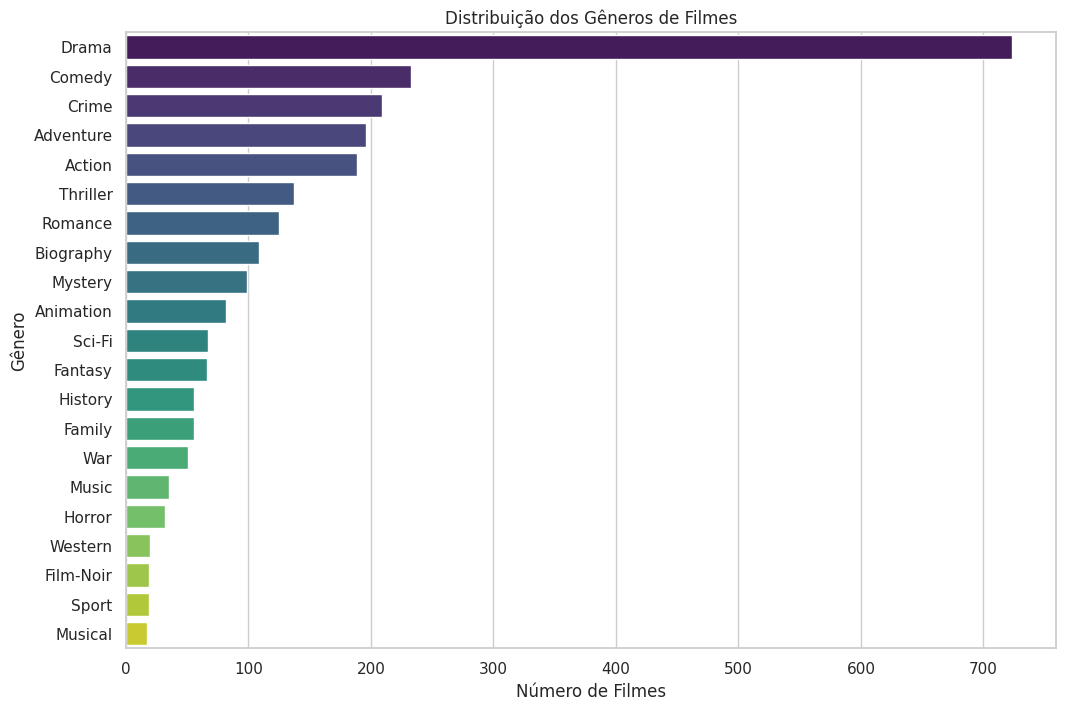

In [26]:
# Configurar o estilo dos gráficos
sns.set_theme(style="whitegrid")

# Distribuição dos Gêneros
generos = data["Genre"].str.get_dummies(sep=", ")
contagem_generos = generos.sum().sort_values(ascending=False)

# Plotar a distribuição dos gêneros
plt.figure(figsize=(12, 8))
sns.barplot(
    x=contagem_generos.values,
    y=contagem_generos.index,
    hue=contagem_generos.index,
    palette="viridis",
    legend=False,
)
# Títutlo
plt.title("Distribuição dos Gêneros de Filmes")
plt.xlabel("Número de Filmes")
plt.ylabel("Gênero")
plt.show()

In [27]:
print("Certificados mais Repetitidos")
print("*" * 30)
data["Certificate"].value_counts().to_frame().style.highlight_max(color="red")

Certificados mais Repetitidos
******************************


,count
Certificate,
U,234
A,196
UA,175
R,146
Unknown,101
PG-13,43
PG,37
Passed,34
G,12


* **Ação**: Analisar os filmes com as melhores notas no IMDB e maiores números de votos.
* **Ferramentas**: `pandas`para filtrar e ordenar os dados.

In [28]:
# melhores filmes avaliados por votos à cada ano
data = data.sort_values(by="Released_Year", ascending=False)
melhores_filmes_avaliados = pd.DataFrame(columns=data.columns)

for year in data["Released_Year"].unique():
    if year not in [2025, 2024, 2023]:
        df_year = data[data["Released_Year"] == year]
        if not df_year.empty:
            df_year_sorted = df_year.sort_values(by="No_of_Votes", ascending=False)
            melhores_filmes_avaliado = df_year_sorted.iloc[0]
            melhores_filmes_avaliados = pd.concat(
                [melhores_filmes_avaliados, melhores_filmes_avaliado.to_frame().T],
                ignore_index=True,
            )

In [29]:
# Mostrar os 10 melhores filmes avaliados por votos à cada ano
melhores_filmes_avaliados.head(10)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,Soul,2020.0,U,100,"Animation, Adventure, Comedy",8.1,"After landing the gig of a lifetime, a New Yor...",83.0,Pete Docter,Kemp Powers,Jamie Foxx,Tina Fey,Graham Norton,159171,68082574.104819
1,Joker,2019.0,A,122,"Crime, Drama, Thriller",8.5,"In Gotham City, mentally troubled comedian Art...",59.0,Todd Phillips,Joaquin Phoenix,Robert De Niro,Zazie Beetz,Frances Conroy,939252,335451311.0
2,Avengers: Infinity War,2018.0,UA,149,"Action, Adventure, Sci-Fi",8.4,The Avengers and their allies must be willing ...,68.0,Anthony Russo,Joe Russo,Robert Downey Jr.,Chris Hemsworth,Mark Ruffalo,834477,678815482.0
3,Logan,2017.0,A,137,"Action, Drama, Sci-Fi",8.1,"In a future where mutants are nearly extinct, ...",77.0,James Mangold,Hugh Jackman,Patrick Stewart,Dafne Keen,Boyd Holbrook,647884,226277068.0
4,Deadpool,2016.0,R,108,"Action, Adventure, Comedy",8.0,A wisecracking mercenary gets experimented on ...,65.0,Tim Miller,Ryan Reynolds,Morena Baccarin,T.J. Miller,Ed Skrein,902669,363070709.0
5,Mad Max: Fury Road,2015.0,UA,120,"Action, Adventure, Sci-Fi",8.1,"In a post-apocalyptic wasteland, a woman rebel...",90.0,George Miller,Tom Hardy,Charlize Theron,Nicholas Hoult,Zoë Kravitz,882316,154058340.0
6,Interstellar,2014.0,UA,169,"Adventure, Drama, Sci-Fi",8.6,A team of explorers travel through a wormhole ...,74.0,Christopher Nolan,Matthew McConaughey,Anne Hathaway,Jessica Chastain,Mackenzie Foy,1512360,188020017.0
7,The Wolf of Wall Street,2013.0,A,180,"Biography, Crime, Drama",8.2,"Based on the true story of Jordan Belfort, fro...",75.0,Martin Scorsese,Leonardo DiCaprio,Jonah Hill,Margot Robbie,Matthew McConaughey,1187498,116900694.0
8,The Dark Knight Rises,2012.0,UA,164,"Action, Adventure",8.4,Eight years after the Joker's reign of anarchy...,78.0,Christopher Nolan,Christian Bale,Tom Hardy,Anne Hathaway,Gary Oldman,1516346,448139099.0
9,Harry Potter and the Deathly Hallows: Part 2,2011.0,UA,130,"Adventure, Drama, Fantasy",8.1,"Harry, Ron, and Hermione search for Voldemort'...",85.0,David Yates,Daniel Radcliffe,Emma Watson,Rupert Grint,Michael Gambon,764493,381011219.0


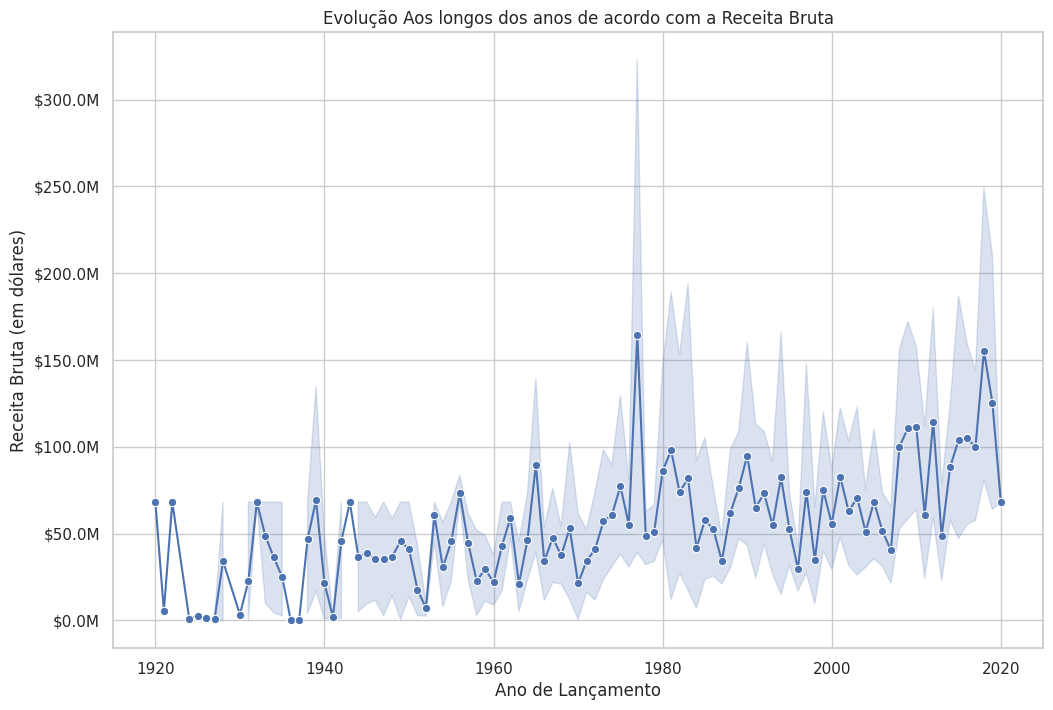

In [30]:
# Análise Temporal de Bilheteria ao longo dos anos
from matplotlib.ticker import FuncFormatter

# Função para formatar os valores como dólares
def formatar_dolar(x, pos):
    return '${:.1f}M'.format(x*1e-6)

plt.figure(figsize=(12, 8))
sns.lineplot(data=data, x="Released_Year", y="Gross", marker="o")
plt.title("Evolução Aos longos dos anos de acordo com a Receita Bruta")
plt.xlabel("Ano de Lançamento")
plt.ylabel("Receita Bruta (em dólares)")

# Formatar o eixo y como dólares
formatter = FuncFormatter(formatar_dolar)
plt.gca().yaxis.set_major_formatter(formatter)
plt.show()

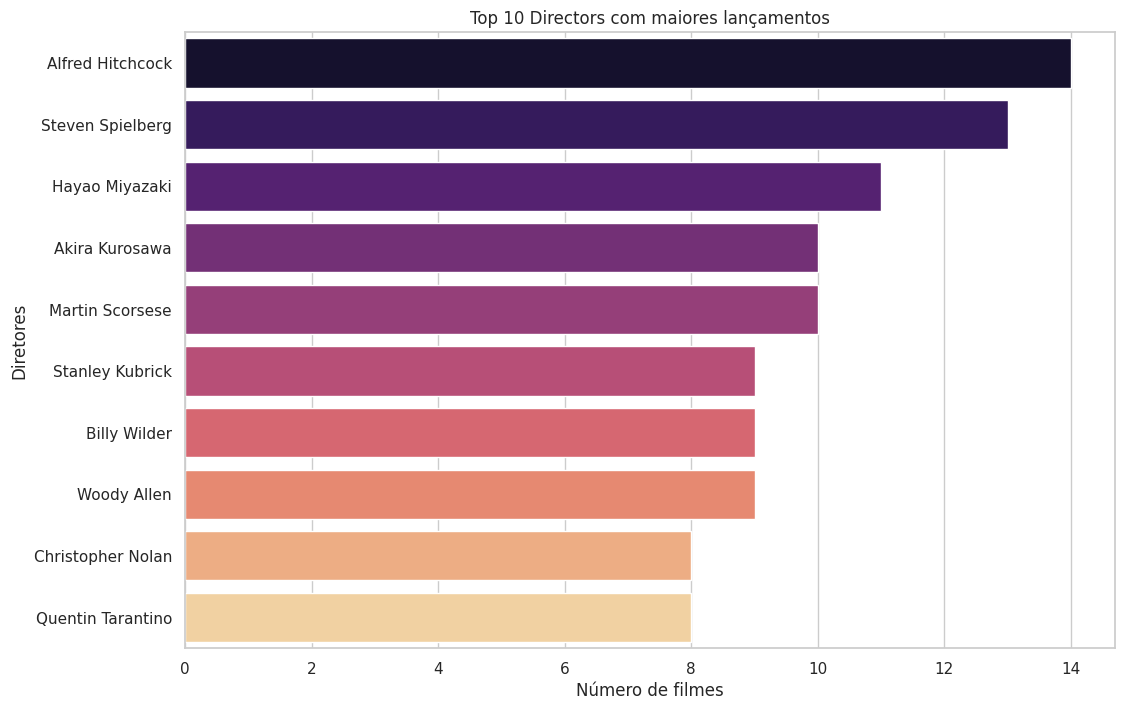

In [31]:
# Obtenha os diretores com os maiores números de lançamentos
contagem_diretor = data["Director"].value_counts().sort_values(ascending=False)
contagem_diretor_df = contagem_diretor.to_frame().reset_index()
contagem_diretor_df.columns = ["Director", "count"]

# Plotar os dados
plt.figure(figsize=(12, 8))
sns.barplot(
    x="count",
    y="Director",
    hue="Director",
    data=contagem_diretor_df.head(10),
    palette="magma",
)
plt.title("Top 10 Directors com maiores lançamentos")
plt.xlabel("Número de filmes")
plt.ylabel("Diretores")
plt.show()

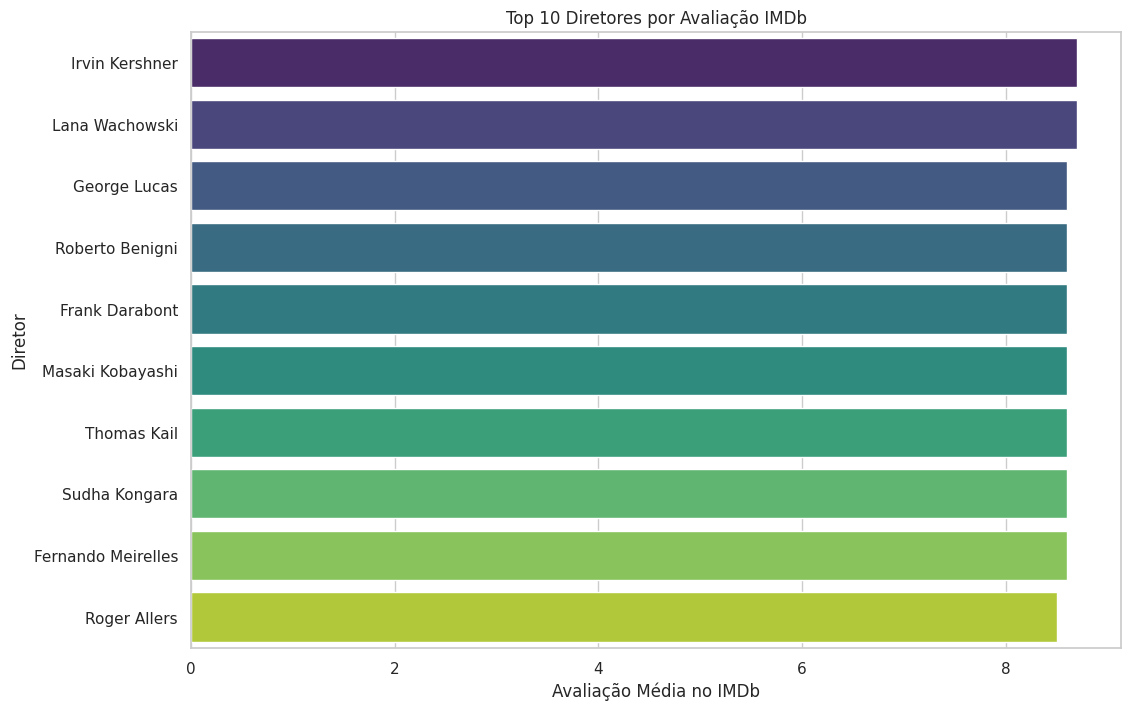

In [32]:
# Análise de Diretores e Atores
# Top 10 Diretores por Avaliação IMDb
top_diretores = (
    data.groupby("Director")["IMDB_Rating"].mean().sort_values(ascending=False).head(10)
)

# Plotar os top 10 diretores
plt.figure(figsize=(12, 8))
sns.barplot(
    x=top_diretores.values,
    y=top_diretores.index,
    hue=top_diretores.index,
    palette="viridis",
)
plt.title("Top 10 Diretores por Avaliação IMDb")
plt.xlabel("Avaliação Média no IMDb")
plt.ylabel("Diretor")
plt.show()

# 4. Modelagem Preditiva
* Modelo Utilizado: `Regressão Linear` para prever a nota do IMDB.
* Tipo de Problema: Regressão.
* Avaliação do Modelo: `Mean Squared Error (MSE)` e `R-squared (R²)`.

In [33]:

# Preencher valores ausentes com a moda em colunas categóricas
categorical_cols = [
    "Certificate",
    "Genre",
    "Director",
    "Star1",
    "Star2",
    "Star3",
    "Star4",
]
for col in categorical_cols:
    if col in data.columns:
        data[col] = data[col].fillna(data[col].mode()[0])

# Codificação one-hot para colunas categóricas
data = pd.get_dummies(data, columns=categorical_cols)

# Seleção
X = data.drop(columns=["IMDB_Rating", "Series_Title", "Overview"])
y = data["IMDB_Rating"]

# Divisão dos dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Imputar valores ausentes nas colunas numéricas
imputer = SimpleImputer(strategy="mean")
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns)

# Normalização dos dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_teste = scaler.transform(X_test)

# Treinamento do modelo de Regressão Linear
model = LinearRegression()
model.fit(X_train, y_train)

# Previsões no conjunto de teste
y_pred = model.predict(X_test)

# Avaliação do modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"MSE: {mse}, R2: {r2}")

MSE: 1290720796227.9893, R2: -15169959054909.312


/home/diel/Documentos/desafio-ds-imdb-diel/.conda/lib/python3.11/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


# 5.Previsão da Nota do IMDb para um Filme Específico
* **Ação**: Utilizar o modelo treinado para prever a nota do IMDB de um filme com as características fornecidas.
* **Ferramentas**: `pandas` para preparar os dados de entrada, `sklearn` para aplicar o modelo treinado.

In [34]:
# Características do filme
filme = {
    "Series_Title": "The Shawshank Redemption",
    "Released_Year": 1994,
    "Certificate": "A",
    "Runtime": 142,
    "Genre": "Drama",
    "Meta_score": 80.0,
    "Director": "Frank Darabont",
    "Star1": "Tim Robbins",
    "Star2": "Morgan Freeman",
    "Star3": "Bob Gunton",
    "Star4": "William Sadler",
    "No_of_Votes": 2343110,
    "Gross": 28341469,
}

# Transformar os dados em um DataFrame
filme_df = pd.DataFrame([filme])

# Aplicar a mesma codificação one-hot
filme_df = pd.get_dummies(
    filme_df,
    columns=["Certificate", "Genre", "Director", "Star1", "Star2", "Star3", "Star4"],
)

# Alinhar o DataFrame do filme com as colunas do conjunto de treino
filme_df = filme_df.reindex(columns=X.columns, fill_value=0)

# Normalizar os dados do filme
X_film = scaler.transform(filme_df)

# Prever a nota do IMDb
nota_imdb = model.predict(X_film)
print(f"Nota do IMDb prevista: {nota_imdb[0]}")

Nota do IMDb prevista: 7.707787939089846


In [35]:
import joblib
# Salvar o modelo em formato .pkl
joblib.dump(model, 'modelo_imdb.pkl')

['modelo_imdb.pkl']